# Lecture 7: Cluster Analysis

## 7.1 군집분석이란?	
- 관측치들을 여러 개의 서로 배타적인 그룹으로 분류하여 서로 유사한 것을 같은 그룹으로 모이도록 하는 것
- 범주(그룹)에 대한 사전 정보가 없음: Unsupervised learning
- 동일한 군집 내의 관찰치는 서로 비슷한 속성을 갖도록, 다른 군집의 관칠치는 서로 상이한 속성을 갖도록 군집 형성

#### 군집분석의 활용
- 데이터 탐색
    - 시장에서 경쟁관계에 있는 상품이나 기업의 속성에 따라 군집화를 통해 잠재적인 신제품 기회 발견
    - 데이터에 잠재되어 있는 패턴 및 규칙 파악

 <img src='http://drive.google.com/uc?export=view&id=1Yd3l3VCoMS8AVKgLtSEqlYeYzGEoEtok' width=50%/><br>
 

- 데이터 분할 목적
    - 구매태도, 구매성향, 매체사용습관 등과 같은 특성에 따라 공통적인 특성을 공유하는 사람, 시장, 조직의 군집을 통한 시장세분화/고객세분화

<img src='http://drive.google.com/uc?export=view&id=1vw703NXGBTV8i-y5A9FDHHmG3DQ_Z4IS' width=40% align="left"/><br>

<img src='http://drive.google.com/uc?export=view&id=1NUHagTuL1UIfWw3iX5C1sK0LBQXlFP_2' width=40% aligh="left"/><br>

- 머신 러닝 적용 이전의 데이터 준비
    - 금융시장에서 비슷한 패턴을 가진 종목들로 분할한 후 예측모형 적용
    - 텍스트마이닝 과정에서 text categorization, text clustering, concept/entity extraction에 적용


## 7.2 군집분석의 문제	
- 가깝다는 것을 어떻게 정의할 것인가?
    - Dissimilarity measure의 정의
- 어떤 방법으로 군집화 할 것인가?
    - Hierarchical clustering, non-hierarchical clustering, model-based clustering 등으로 구분
- 군집 결과를 어떻게 시각화 할 것인가?
    - Heatmap, bar graph 등의 활용 
- 군집 결과를 어떻게 해석할 것인가? 

## 7.3 Dissimilarity measure 
- 유클리드 거리(Euclidean distance)
    $$d_{ij}=\sqrt{\sum_k (x_{ik} - x_{jk})^2} $$
    - 두 점 사이를 잇는 직선거리로 측정 
    - 변수 들의 서로 다른 단위를 가진 경우가 많으므로 주로 표준화된 자료에 사용
    - $l_2$-distance, MSE(RMSE) 계산의 기초
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [2]:
data = pd.DataFrame({"x1":[1,2,3,5,0,2], "x2":[1,4,2,3,2,5]})
data

,x1,x2
0,1,1
1,2,4
2,3,2
3,5,3
4,0,2
5,2,5


In [3]:
squareform(pdist(data, metric='euclidean'))

array([[0.        , 3.16227766, 2.23606798, 4.47213595, 1.41421356,
        4.12310563],
       [3.16227766, 0.        , 2.23606798, 3.16227766, 2.82842712,
        1.        ],
       [2.23606798, 2.23606798, 0.        , 2.23606798, 3.        ,
        3.16227766],
       [4.47213595, 3.16227766, 2.23606798, 0.        , 5.09901951,
        3.60555128],
       [1.41421356, 2.82842712, 3.        , 5.09901951, 0.        ,
        3.60555128],
       [4.12310563, 1.        , 3.16227766, 3.60555128, 3.60555128,
        0.        ]])

In [4]:
pd.DataFrame(squareform(pdist(data, metric='euclidean')))

,0,1,2,3,4,5
0,0.000000,3.162278,2.236068,4.472136,1.414214,4.123106
1,3.162278,0.000000,2.236068,3.162278,2.828427,1.000000
2,2.236068,2.236068,0.000000,2.236068,3.000000,3.162278
3,4.472136,3.162278,2.236068,0.000000,5.099020,3.605551
4,1.414214,2.828427,3.000000,5.099020,0.000000,3.605551
5,4.123106,1.000000,3.162278,3.605551,3.605551,0.000000


In [5]:
pdist(data, metric='euclidean') # 대각선 위의 방향만 출력

array([3.16227766, 2.23606798, 4.47213595, 1.41421356, 4.12310563,
       2.23606798, 3.16227766, 2.82842712, 1.        , 2.23606798,
       3.        , 3.16227766, 5.09901951, 3.60555128, 3.60555128])

- 맨하탄 거리(Manhattan distance)
    $$ d_{ij}=\sum_k \left|x_{ik} - x_{jk} \right| $$
    - 두 점 사이의 거리를 좌표값 차이의 절대값의 합으로 표현 
    - $l_1$-distance, MAE 계산의 기초 

In [6]:
squareform(pdist(data, metric='cityblock'))

array([[0., 4., 3., 6., 2., 5.],
       [4., 0., 3., 4., 4., 1.],
       [3., 3., 0., 3., 3., 4.],
       [6., 4., 3., 0., 6., 5.],
       [2., 4., 3., 6., 0., 5.],
       [5., 1., 4., 5., 5., 0.]])

In [7]:
pd.DataFrame(squareform(pdist(data, metric='cityblock')))

,0,1,2,3,4,5
0,0.0,4.0,3.0,6.0,2.0,5.0
1,4.0,0.0,3.0,4.0,4.0,1.0
2,3.0,3.0,0.0,3.0,3.0,4.0
3,6.0,4.0,3.0,0.0,6.0,5.0
4,2.0,4.0,3.0,6.0,0.0,5.0
5,5.0,1.0,4.0,5.0,5.0,0.0


- 마할라노비스 거리 (Mahalanobis Distance)
    $$D_{ij} = (\mathbf x_i - \mathbf x_j)' \Sigma^{-1} (\mathbf x_i - \mathbf x_j) $$
    - 확률 분포(공분산 행렬)를 고려한 거리 
    - 유클리드 거리 측도에 의하면 B가 A에 비해 원점에 가깝지만 마할라노비스 거리 측도에 의하면 거리가 같음 
    - Rotation과 Scale에 의해 자료를 변환하여 공분산행렬을 I로 만드는 효과

In [8]:
squareform(pdist(data, metric='mahalanobis'))

array([[0.        , 2.03943424, 1.22880257, 2.45760514, 1.03050808,
        2.71935866],
       [2.03943424, 0.        , 1.65797883, 2.08767983, 1.60198991,
        0.70161003],
       [1.22880257, 1.65797883, 0.        , 1.22880257, 1.79878277,
        2.32816537],
       [2.45760514, 2.08767983, 1.22880257, 0.        , 2.90330907,
        2.54277564],
       [1.03050808, 1.60198991, 1.79878277, 2.90330907, 0.        ,
        2.14646241],
       [2.71935866, 0.70161003, 2.32816537, 2.54277564, 2.14646241,
        0.        ]])

In [9]:
pd.DataFrame(squareform(pdist(data, metric='mahalanobis')))

,0,1,2,3,4,5
0,0.000000,2.039434,1.228803,2.457605,1.030508,2.719359
1,2.039434,0.000000,1.657979,2.087680,1.601990,0.701610
2,1.228803,1.657979,0.000000,1.228803,1.798783,2.328165
3,2.457605,2.087680,1.228803,0.000000,2.903309,2.542776
4,1.030508,1.601990,1.798783,2.903309,0.000000,2.146462
5,2.719359,0.701610,2.328165,2.542776,2.146462,0.000000


## 7.4 Hierarchical clustering
- 관측치 간의 유사성을 계산해 가까운 개체들을 군집화
- 한번 한 군집에 소속되면 이동 불가능  
- 덴드로그램(Dendrogram)을 사용해 군집형성 과정 파악 가능
- 알고리즘
    - step 0. 각 관측치가 하나의 군집을 형성하는 상태에서 시작($C_1, \ldots, C_n;$ n개의 군집) 
    
    두 군집 사이의 거리 계산 $d_{C_i, C_j}=d_{ij}$
    - step 1. 가장 거리가 가까운 두 군집을 찾아 합쳐 새로운 군집 생성
    - step 2. 새 군집과 기존 군집들 간의 거리 계산 
    - step 3. 하나의 군집이 남을 때 까지 step 1 & 2 반복
- 군집 간의 거리를 정의하는 방법에 따라 Single/Complete/Average linkage로 구분

### 7.4.1 Single linkage method
- 군집i에 속한 관측치와 군집j에 속한 관측치들의 모든 조합 간의 거리 중 **가장 짧은 거리**를 군집i와 군집j의 거리로 정의
- 계산이 효율적
- 근시안적: 길다란 형태의 군집 형성 가능

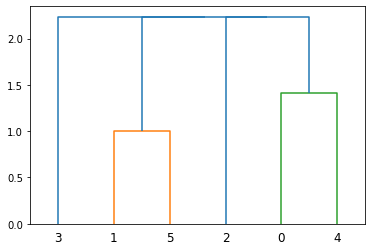

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

clust_single = linkage(data, method='single')

dendrogram(clust_single)
plt.show()

In [11]:
np.round(squareform(pdist(data, metric='euclidean')),2)

array([[0.  , 3.16, 2.24, 4.47, 1.41, 4.12],
       [3.16, 0.  , 2.24, 3.16, 2.83, 1.  ],
       [2.24, 2.24, 0.  , 2.24, 3.  , 3.16],
       [4.47, 3.16, 2.24, 0.  , 5.1 , 3.61],
       [1.41, 2.83, 3.  , 5.1 , 0.  , 3.61],
       [4.12, 1.  , 3.16, 3.61, 3.61, 0.  ]])

### 7.4.2 Complete linkage method
- 군집i에 속한 관측치와 군집j에 속한 관측치들의 모든 조합 간의 거리 중 **가장 긴 거리**를 군집i와 군집j의 거리로 정의
- 군집과 군집을 합할 때 군집의 모든 개체가 서로 가깝게 됨
- Single linkage에 비해 convex한 군집 형성
- 이상치에 민감

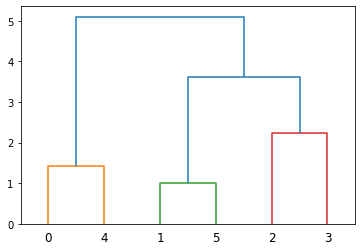

In [12]:
clust_complete = linkage(data, method='complete')

dendrogram(clust_complete)
plt.show()

### 7.4.3 Average linkage method
- 군집i에 속한 관측치와 군집j에 속한 관측치들의 모든 조합 간의 거리 **평균**을  군집i와 군집j의 거리로 정의

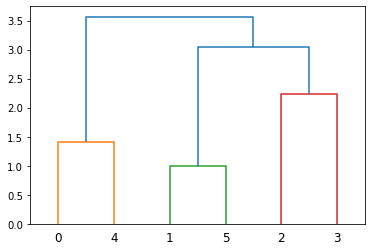

In [13]:
clust_avg = linkage(data, method='average')

dendrogram(clust_avg)
plt.show()

### 7.4.4 Ward's method
- 매 단계에서 군집 간 정보의 손실을 최소화 하도록 군집
    - Minimum variance method
    - 클러스터 C의 군집내거리(within-cluster distance)를 최소화 하도록 군집
    $$ESS_C = \sum_j (x_{C_j} - \bar x_C)'(x_{C_j} - \bar x_C)$$
    
- 비슷한 크기의 군집을 생성하는 경향
- 비계층적 군집화 방법과 비슷한 결과를 생성하는 경향

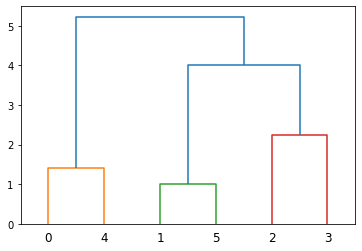

In [14]:
clust_ward = linkage(data, method='ward')

dendrogram(clust_ward)
plt.show()

### 7.4.5 Number of clusters
- 군집 개수의 결정 
    - 덴드로그램을 어디서 자를 것인가? 
    - 데이터에 최적인 특정한 그룹의 개수를 어떻게 정할 것인가?
    - 명확한 정답이 없음 
    - 탐색적으로 사용 

- Rule of Thumb
    - 덴드로그램 높이 변화의 크기를 조사하여 큰 변화가 있는 곳에서 자름
        - 군집 간의 거리 차이에 큰 변화를 보이는 경우를 고려해 군집 개수 결정
    - ESS의 증가가 급격한 위치에서 군집의 개수 결정
    - 적절한 군집의 개수가 알려져 있을 경우 해당 군집 개수를 얻는 위치에서 자름

- `cut_tree` 함수 사용하여 군집분석의 해 얻음

In [15]:
cut_tree(clust_ward, 3)

array([[0],
       [1],
       [2],
       [2],
       [0],
       [1]])

### Example: USArrests
- 미국 50개 주의 인구 10만명 당 범죄 발생 건수(Murder, Assault, Rape)와 도심 지역의 거주 비율(UrbanPop)을 기록
- 변수 간의 단위가 다르기 때문에 scale후 군집 진행

In [16]:
data_path = "../data/"
usarrests = pd.read_csv(data_path + "USArrests.csv", index_col=0)

usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [17]:
usarrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [18]:
from sklearn.preprocessing import StandardScaler

usarrests_s = StandardScaler().fit_transform(usarrests)
usarrests_s = pd.DataFrame(usarrests_s, columns=usarrests.columns, index=usarrests.index)

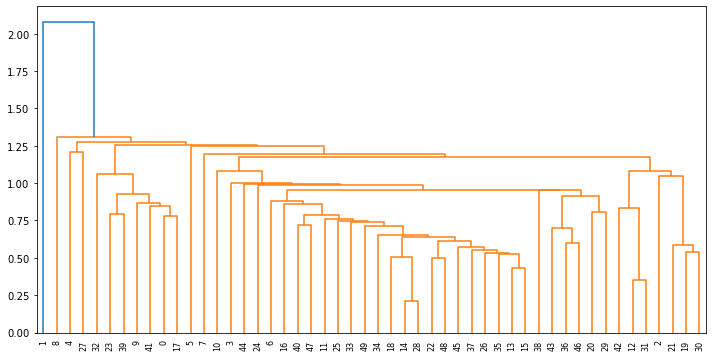

In [19]:
hc_single = linkage(usarrests_s, method="single")

plt.figure(figsize = (12,6))
dendrogram(hc_single)
plt.show()

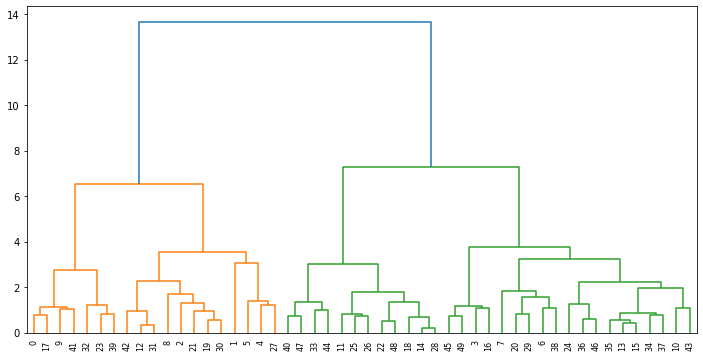

In [20]:
hc_ward = linkage(usarrests_s, method="ward")

plt.figure(figsize = (12,6))
dendrogram(hc_ward)
plt.show()

- 군집의 개수가 4개가 되도록 dendrogram을 잘라 cluster 할당 

In [21]:
cluster = cut_tree(hc_ward, 4)
usarrests['cluster'] = cluster
usarrests.cluster = usarrests.cluster.astype('category')
usarrests.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [22]:
usarrests.cluster.value_counts()

2    19
1    12
3    12
0     7
Name: cluster, dtype: int64

- 변수 간의 scatterplot으로 군집 특성 파악

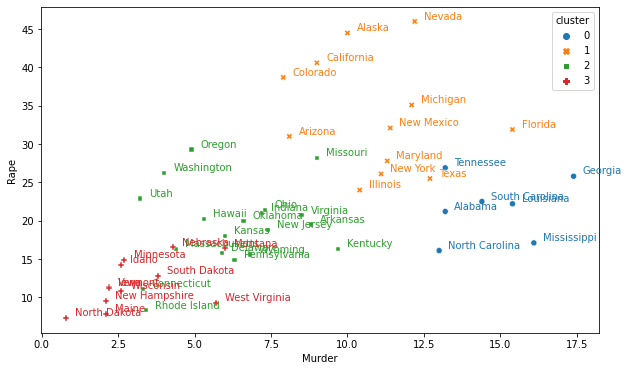

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster", style="cluster", data=usarrests)
for i in range(usarrests.shape[0]):
    plt.text(x=usarrests.Murder[i]+0.3, 
            y=usarrests.Rape[i]+0.3,
            s=usarrests.index[i],
            color=sns.color_palette()[usarrests.cluster[i]])
plt.show()

- 각 군집의 변수 값의 평균을 비교하여 군집의 특성 파악

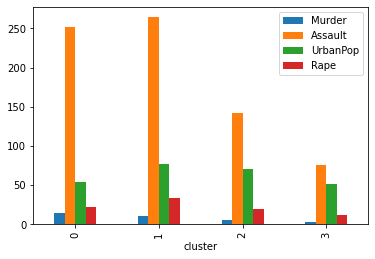

In [24]:
usarrests.groupby('cluster').mean().plot.bar()
plt.show()

## 7.5 Non-hierarchical clustering
### 7.5.1 K-means Clustering
- Non-hierarchical clustering의 대표적인 방법
- 군집의 개수를 미리 설정 (k개)
- 알고리즘
    - Step 1. 관측치를 Initial Partition k개로 나누고 각 군집의 중심인 seed 계산
    - Step 2. 각 관측치로부터 각 seed사이의 거리 계산 (n*k개)하여 가장 가까운 seed에 할당
    - Step 3. 군집의 seed를 군집에 속한 관측치의 평균(중심)으로 업데이트
더이상 개체의 군집 이동이 없을 때 까지 반복
 <img src='http://drive.google.com/uc?export=view&id=1Sm_EQ4yvDzdqu34fxIysHSFJUSzZbdbq' /><br>

- 데이터에 대해 spherical 구조를 강요 
- Initial partition(seed)에 따라 다른 군집결과가 나올 수 있음$\Rightarrow$ Random seed를 사용해 여러 번 반복하여 최적의 군집을 찾는 방법이 주로 사용됨

### Example: USArrests – K-means Clustering
- nstart=5: random initial partition에서 시작하여 군집화 하는 과정을 5번 반복하여 within-group sum-of-square가 최소가 되는 결과를 출력 
- centers: 수렴된 최종 군집 결과에 따른 군집 중심
- cluster: 각 관측치에 할당된 군집 
- withinss: 각 군집의 within-group sum-of-square값

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4).fit(usarrests_s)

usarrests_s['cluster_km']=km.labels_
usarrests_s['cluster_km']=usarrests_s['cluster_km'].astype('category')

usarrests_s.cluster_km.value_counts()

1    16
2    13
3    13
0     8
Name: cluster_km, dtype: int64

In [26]:
km.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [27]:
km.cluster_centers_ # 마지막 convergence의 center, 군집별 각 변수의 중심.

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [28]:
pd.DataFrame(km.cluster_centers_,
            columns=usarrests_s.iloc[:,:-1].columns,
            index = ['군집0','군집1','군집2','군집3'])

,Murder,Assault,UrbanPop,Rape
군집0,1.426224,0.883211,-0.822791,0.019467
군집1,-0.494407,-0.386484,0.581676,-0.264310
군집2,-0.971303,-1.117836,-0.939550,-0.976578
군집3,0.702127,1.049994,0.729974,1.289904


In [29]:
km.inertia_ # within-group sum-of-square의 합

57.55425863091106

In [30]:
km.n_clusters

4

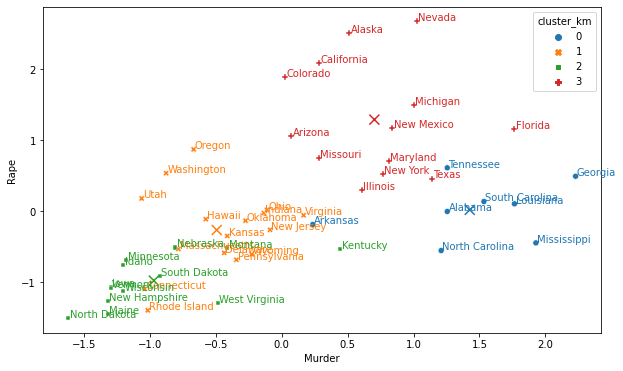

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster_km", style="cluster_km", data=usarrests_s)
for i in range(usarrests_s.shape[0]):
    plt.text(x=usarrests_s.Murder[i]+0.01, 
            y=usarrests_s.Rape[i]+0.01,
            s=usarrests_s.index[i],
            color=sns.color_palette()[usarrests_s.cluster_km[i]])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,3], marker="x", s=100,
            color=sns.color_palette()[:4])
plt.show()

### 7.5.2 Number of Clusters
- Hierarchical clustering과 마찬가지로 명확한 rule은 없음 
- Within-group sum of squares는 군집의 개수가 늘어날 때 감소
    - ESS의 감소가 완만해 지는 ‘팔꿈치＇에서 결정

In [32]:
wss=[]
for k in np.arange(1,20):
    km_k = KMeans(n_clusters=k).fit(usarrests_s)
    wss.append(km_k.inertia_)

In [33]:
wss # 군집의 갯수가 증가할 수록, wss(군집내거리의 합)은 감소

[253.78000000000003,
 153.70488137733346,
 90.43087138822995,
 57.55425863091106,
 51.51163568688111,
 45.861040815243456,
 41.09797876057892,
 38.58642749441818,
 32.450637955631635,
 30.453043573059578,
 26.940304418983775,
 25.840267783901513,
 22.64283886141884,
 21.6402675847069,
 19.015774764915815,
 17.554721349803156,
 16.50927161979084,
 15.574287191314424,
 14.473539743241522]

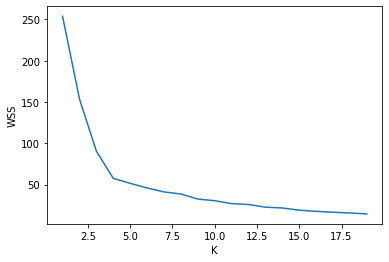

In [34]:
plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

## 7.6 Model-based clustering: Gaussian Mixture Model
- 각 군집에 속하는 관측치가 서로 다른 확률분포를 가지는 모집단에서 추출되었다고 가정하에 모형을 추정하고 이에 기반하여 군집화 

#### Gaussian Mixture Model 
- 각 군집의 확률분포 $f(x; \theta)$를  평균이 $\mu_k$, 공분산행렬이  $\Sigma_k$인 다변량 정규분포로 가정 
$$ f(x) = \sum_{k=1}^G \pi_k f(x; \mu_k, \Sigma_k), ~~\sum_k \pi_k = 1$$ 
- G:그룹의 개수, d:변수의 개수
<img src='http://drive.google.com/uc?export=view&id=1ZpqpxUWf7s0DAFt0xpJpA3fM-cNIOV94' /><br>
   

#### 공분산 행렬 $\Sigma_k$에 대한 가정
- Spherical: each component has its own single variance
- Diagonal: each component has its own diagonal covariance matrix
- Tied: all components share the same general covariance matrix
- Full: each component has its own general covariance matrix

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_001.png' width=50%>

- EM (Expectation-Maximization) 알고리즘을 통해 평균과 공분산 행렬을 추정
- 각 관측치에 대해 각 군집에 속할 사후 확률(posterior probability)을 계산하여 가장 확률이 높은 군집으로 할당
- 모형선택방법 BIC (Bayesian information criterion)을 사용해 군집의 개수 및 적절한 공분산행렬의 모양 선택 가능
    - BIC값이 최소가 되는 모형 선택
    $$BIC=- 2\cdot \mbox{loglikelihood} + \mbox{(# of parameters)}$$
- n이 커지면 속도가 느림

### Example: USArrests – Gaussian Mixture Model

In [35]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(usarrests_s.iloc[:,:-1])

In [36]:
gmm.means_ # mu_k

array([[ 0.82238748,  1.05410867,  0.81805646,  1.09930293],
       [-0.4791435 , -0.29220781,  0.53180098, -0.2363254 ],
       [-0.82939821, -1.01284749, -0.71636299, -0.83698227],
       [ 1.41806776,  1.01708774, -0.98131072,  0.39546726]])

In [37]:
gmm.covariances_.shape # Sigma_k

(4, 4, 4)

In [38]:
usarrests_s.head()

,Murder,Assault,UrbanPop,Rape,cluster_km
Alabama,1.255179,0.790787,-0.526195,-0.003451,0
Alaska,0.513019,1.118060,-1.224067,2.509424,3
Arizona,0.072361,1.493817,1.009122,1.053466,3
Arkansas,0.234708,0.233212,-1.084492,-0.186794,0
California,0.281093,1.275635,1.776781,2.088814,3


In [39]:
gmm.bic(usarrests_s.iloc[:,:-1]) # cluster_km 제외

611.5601397641475

#### Model selection

In [40]:
# R: MCLUST package

In [41]:
bic=[]
lowest_bic = np.infty
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types: 
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type,
                             random_state = 1000)
        gmm.fit(usarrests_s.iloc[:,:4])
        bic.append(gmm.bic(usarrests_s.iloc[:,:4]))
        if bic[-1] < lowest_bic:  
            lowest_bic = bic[-1]
            best_gmm = gmm
            print(n_components, cv_type)

1 spherical
2 spherical
3 spherical
6 spherical


In [42]:
best_gmm.means_

array([[-0.70207262, -0.52801623,  1.02994395, -0.47009706],
       [ 1.5791695 ,  0.98138861, -0.78483706,  0.04850085],
       [-1.1473069 , -1.19673332, -1.04319654, -1.09769652],
       [ 0.744211  ,  1.08945021,  0.92099885,  1.20862797],
       [-0.23582769, -0.3336655 , -0.11815495, -0.14501893],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [43]:
best_gmm.covariances_ # 여기에 identity Matrix 곱해진게 각 집단의 공분산

array([2.33158103e-01, 2.30072553e-01, 1.90874334e-01, 3.00643712e-01,
       2.16908818e-01, 1.00000001e-06])

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [44]:
usarrests_s['cluster_gmm']=best_gmm.predict(usarrests_s.iloc[:,:4])
usarrests_s['cluster_gmm']=usarrests_s['cluster_gmm'].astype('category')

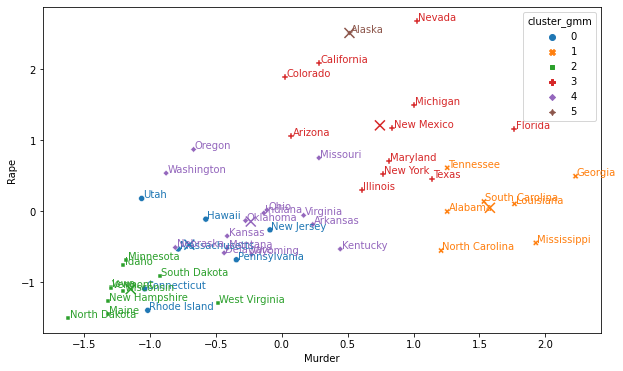

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster_gmm", style="cluster_gmm", data=usarrests_s)
for i in range(usarrests_s.shape[0]):
    plt.text(x=usarrests_s.Murder[i]+0.01, 
            y=usarrests_s.Rape[i]+0.01,
            s=usarrests_s.index[i],
            color=sns.color_palette()[usarrests_s.cluster_gmm[i]])
plt.scatter(best_gmm.means_[:,0],best_gmm.means_[:,3], marker="x", s=100,
            color=sns.color_palette()[:best_gmm.n_components])
plt.show()

### 7.7 Density-based clustering: DBSCAN
- 데이터포인트가 많은 dense region을 찾아 군집 형성
- 비교적 비어있는 지역을 경계로 다른 클러스터와 구분 
- 알고리즘
    - Core sample의 이웃이면 같은 클러스터 할당
    - 이웃이 core sample이면 그 이웃도 같은 클러스터 
    - 이웃에 core sample이 없을 때 까지 확장

<img src='http://drive.google.com/uc?export=view&id=1IEWM8d08g7ioJxUczFQf6sXH4xvl7dMz' /><br>

- 특징 
    - 매우 큰 데이터에 사용 가능 
    - 여러 번 실행해도 core sample의 군집은 언제나 동일 
    - Boundary sample의 클러스터 할당은 입력 순서에 따라 달라짐(보통 수가 많지 않으므로 큰 문제 안됨)
    - 클러스터 개수의 자동 선택 
    - 복잡한 형상의 clustering 가능 
- eps가 커지면 
    - 한 클러스터에 포함되는 sample 증가
    - noise sample 감소 
- minPts가 커지면 
    - core sample 감소
    - noise sample 증가 

### Example: USArrests – DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
cluster_dbscan = dbscan.fit_predict(usarrests_s)

In [47]:
usarrests_s['cluster_dbscan']=cluster_dbscan
usarrests_s['cluster_dbscan'] = usarrests_s['cluster_dbscan'].astype('category')

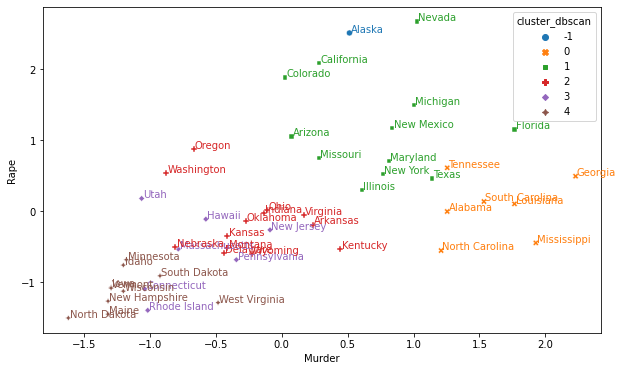

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster_dbscan", style="cluster_dbscan", data=usarrests_s)
for i in range(usarrests_s.shape[0]):
    plt.text(x=usarrests_s.Murder[i]+0.01, 
            y=usarrests_s.Rape[i]+0.01,
            s=usarrests_s.index[i],
            color=sns.color_palette()[usarrests_s.cluster_dbscan[i]+1])
plt.show()

- Noise sample은 -1으로 할당 

## Comparison of Clustering Algorithms

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png" width=70%>

https://scikit-learn.org/stable/modules/clustering.html#dbscan